### Name: Fawzan Nadeem Sayed
### Github Username: fawzansayed
### USC ID: 5628982715

# Homework 1

In [1]:
from scipy.io import arff
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix

## Question 1(a)

In [2]:
data = arff.loadarff('../data/vertebral_column_data/column_2C_weka.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8') 
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


## Question 1(b)

### (b)i

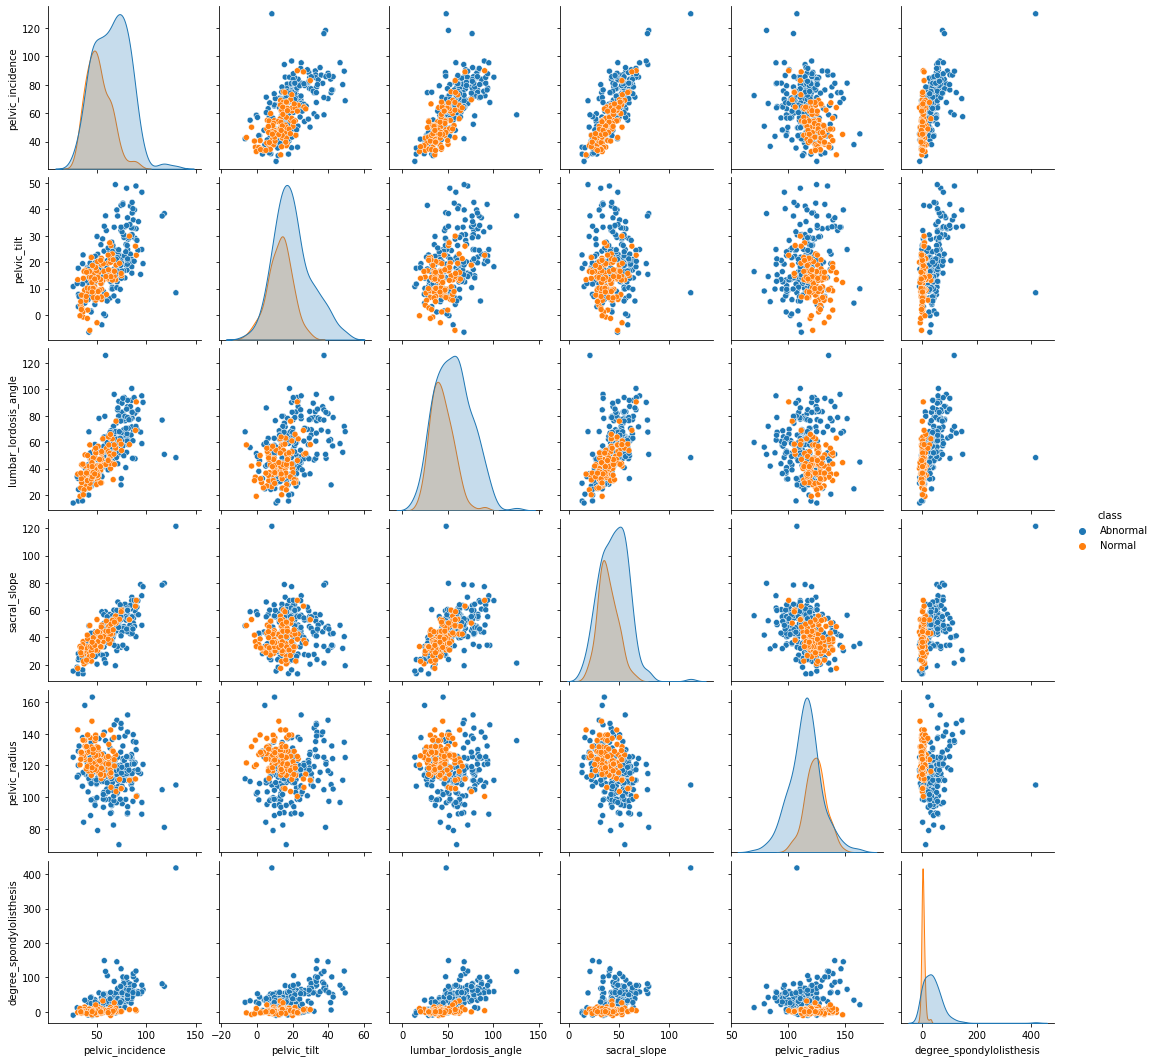

In [3]:
sns.pairplot(df, hue ='class')

### (b)ii

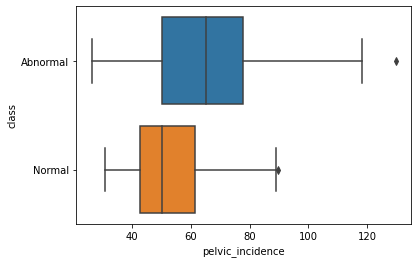

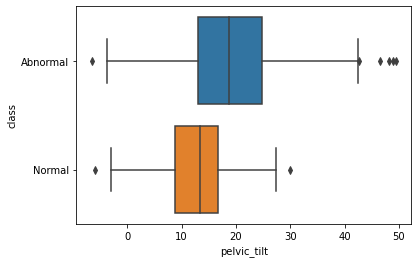

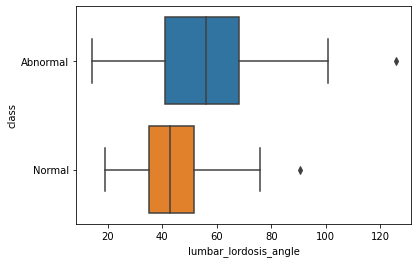

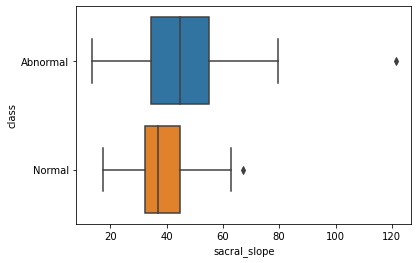

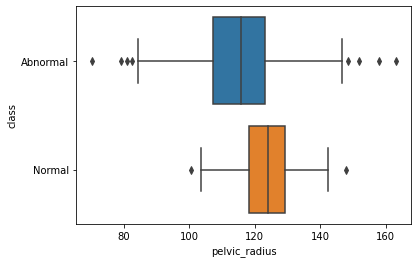

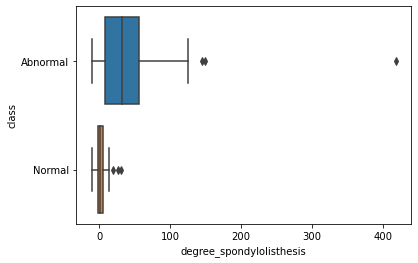

In [4]:
for col in list(df.columns)[:-1] :
    plt.figure()
    sns.boxplot(data=df, x=col, y="class")

In [5]:
density_map = {
    'Normal' : 0,
    'Abnormal' : 1
}
df['class']=df['class'].map(density_map)
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


### (b)iii

In [6]:
train=df[df['class']==0][:70].append(df[df['class']==1][:140],ignore_index=True)
train_x=train.iloc[:, :-1]
train_y=train.iloc[:, -1]
print(train_x)
print(train_y)

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           38.505273    16.964297              35.112814     21.540976   
1           54.920858    18.968430              51.601455     35.952428   
2           44.362490     8.945435              46.902096     35.417055   
3           48.318931    17.452121              48.000000     30.866809   
4           45.701789    10.659859              42.577846     35.041929   
..                ...          ...                    ...           ...   
205         77.121344    30.349874              77.481083     46.771470   
206         88.024499    39.844669              81.774473     48.179830   
207         83.396606    34.310989              78.423293     49.085617   
208         72.054034    24.700737              79.874016     47.353297   
209         85.095503    21.069897              91.734792     64.025606   

     pelvic_radius  degree_spondylolisthesis  
0       127.632875                  7.986683  
1    

In [7]:
cond = df['degree_spondylolisthesis'].isin(train['degree_spondylolisthesis'])
test=df[~cond].reset_index(drop=True)
test_x=test.iloc[:, :-1]
test_y=test.iloc[:, -1]
print(test_x)
print(test_y)

    pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0          69.563486    15.401139              74.438497     54.162347   
1          89.504947    48.903653              72.003423     40.601295   
2          85.290173    18.278890             100.744220     67.011283   
3          60.626217    20.595958              64.535262     40.030259   
4          60.044177    14.309656              58.038865     45.734521   
..               ...          ...                    ...           ...   
95         47.903565    13.616688              36.000000     34.286877   
96         53.936748    20.721496              29.220534     33.215251   
97         61.446597    22.694968              46.170347     38.751628   
98         45.252792     8.693157              41.583126     36.559635   
99         33.841641     5.073991              36.641233     28.767649   

    pelvic_radius  degree_spondylolisthesis  
0      105.067356                 29.701211  
1      134.634291  

## Question 1(c)

### (c)i & (c)ii

Text(0, 0.5, 'Error')

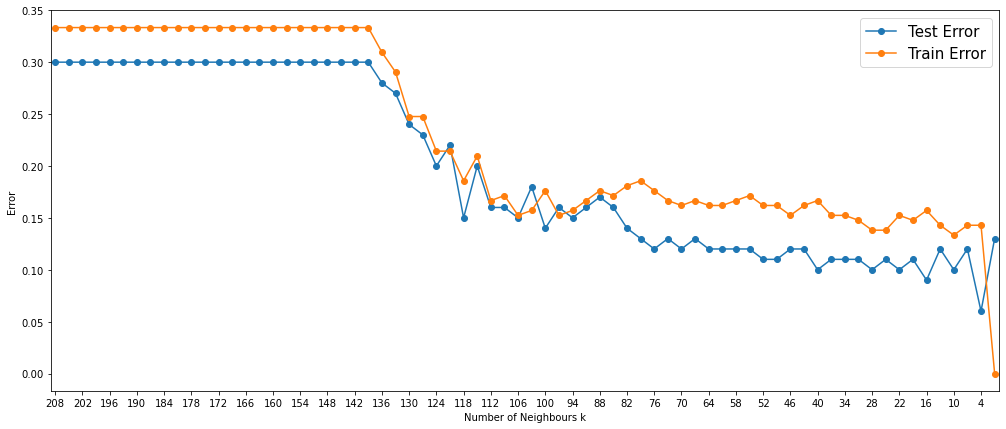

In [8]:
e_test=[]
e_train=[]
for k in np.arange(208, 0, -3) :
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_x,train_y)
    acc=model.score(test_x,test_y)
    e_test.append(1-acc)
    acc2=model.score(train_x,train_y)
    e_train.append(1-acc2)

plt.figure(figsize=(17,7))
plt.xlim(209,0)
plt.xticks(np.arange(208, 0, -6))
plt.plot(np.arange(208, 0, -3),e_test,marker='o')
plt.plot(np.arange(208, 0, -3),e_train,marker='o')
plt.legend(['Test Error','Train Error'],fontsize=15)
plt.xlabel('Number of Neighbours k')
plt.ylabel('Error')

In [9]:
min_e=min(e_test)
min_e

0.06000000000000005

In [10]:
k_star = np.arange(208, 0, -3)[e_test.index(min_e)]
print(k_star)

4


#### The k* with the smallest value of error is 4

C:\Users\fawza\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


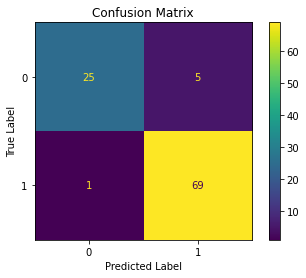

In [11]:
model_k = KNeighborsClassifier(n_neighbors=k_star)
model_k.fit(train_x,train_y)
star_y=model_k.predict(test_x)
CM=confusion_matrix(test_y, star_y,labels=[0,1])


matrix = plot_confusion_matrix(model_k, test_x, test_y)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [12]:
print('True Positive Rate: ',(CM[1,1]/(CM[1,1]+CM[1,0])))

True Positive Rate:  0.9857142857142858


#### The True Positive Rate is 0.986

In [13]:
print('True Negative Rate: ',(CM[0,0]/(CM[0,0]+CM[0,1])))

True Negative Rate:  0.8333333333333334


#### The True Negative Rate is 0.833

In [14]:
print('Precision Score: ',precision_score(test_y, star_y))

Precision Score:  0.9324324324324325


#### The Precision Score is 0.93

In [15]:
print('F-1 Score: ',f1_score(test_y, star_y))

F-1 Score:  0.9583333333333333


#### The F-1 Score is 0.96

### (c)iii

In [16]:
n_err=[]
for n in np.arange(10,211,10) :
    train_n=train[train['class']==0][:int(n/3)].append(train[train['class']==1][:(n-int(n/3))],ignore_index=True)
    x=train_n.iloc[:, :-1]
    y=train_n.iloc[:, -1]
    e_t=[]
    for k in np.arange(1, n+1, 5) :
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(x,y)
        ac=model.score(test_x,test_y)
        e_t.append(1-ac)
    n_err.append(min(e_t))

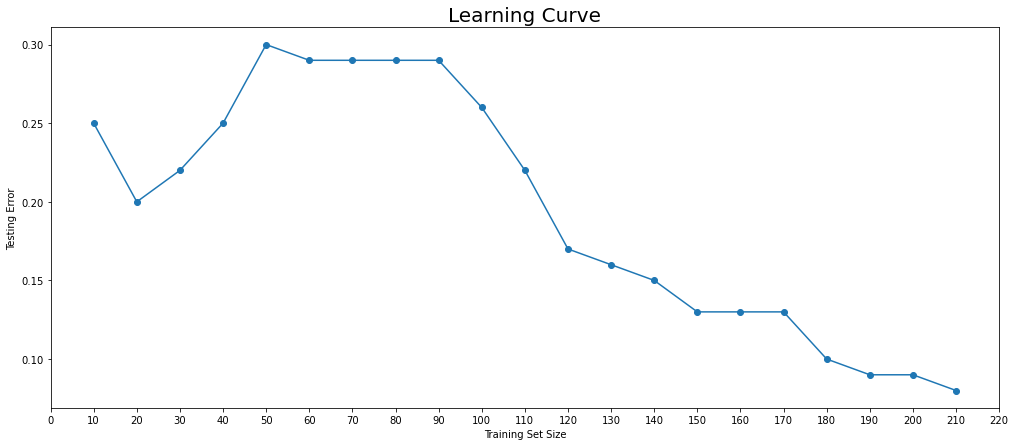

In [17]:
plt.figure(figsize=(17,7))
plt.title('Learning Curve',fontdict={'size':20})
plt.xlabel('Training Set Size')
plt.ylabel('Testing Error')
plt.xticks(np.arange(0,221,10))
plt.plot(np.arange(10,211,10),n_err,marker='o')

## Question 1(d)

### (d)i

### A

In [18]:
k_v=[]
e_man=[]
for k in np.arange(1, 197, 5) :
    model = KNeighborsClassifier(n_neighbors=k,p=1)
    model.fit(train_x,train_y)
    ac=model.score(test_x,test_y)
    if not k > 1 :
        continue
    k_v.append(k)
    e_man.append(1-ac)

k_opt=k_v[e_man.index(min(e_man))]
print(k_opt)
e_man_min=min(e_man)
print(e_man_min)

6
0.10999999999999999


### B

In [19]:
e_p=[]
for p in (np.arange(0.1,1.1,0.1)) :
    model = KNeighborsClassifier(n_neighbors=k_opt,p=10**p)
    model.fit(train_x,train_y)
    ac=model.score(test_x,test_y)
    e_p.append(1-ac)
e_opt1=min(e_p)
p_best=np.arange(0.1,1.1,0.1)[e_p.index(e_opt1)]
print(p_best)
print(e_opt1)

0.6
0.06000000000000005


#### The best log<sub>10</sub>(p) is 0.6

### C

In [20]:
k_va=[]
e_che=[]
for k in np.arange(1, 197, 5) :
    model = KNeighborsClassifier(n_neighbors=k,p=np.inf)
    model.fit(train_x,train_y)
    ac=model.score(test_x,test_y)
    if not k > 1 :
        continue
    k_va.append(k)
    e_che.append(1-ac)

k_opt2=k_va[e_che.index(min(e_che))]
print(k_opt2)
e_che_min=min(e_che)
print(e_che_min)

16
0.07999999999999996


### (d)ii

In [21]:
k_maha=[]
e_maha=[]
for k in np.arange(1, 197, 5) :
    model = KNeighborsClassifier(n_neighbors=k,metric='mahalanobis',metric_params={'VI': np.linalg.pinv(np.cov(train_x,rowvar=False))})
    model.fit(train_x,train_y)
    ac=model.score(test_x,test_y)
    if not k > 1 :
        continue
    k_maha.append(k)
    e_maha.append(1-ac)


k_opt3=k_maha[e_maha.index(min(e_maha))]
print(k_opt3)
e_maha_min=min(e_maha)
print(e_maha_min)

6
0.16000000000000003


#### Summery of the Test Errors for the different Metrics

In [22]:
table={'Metric':['Manhattan Distance','Minkowski Distance log\u2081\u2080(p)','Chebyshev Distance','Mahalanobis Distance'],
       'Test_Error':[e_man_min,e_opt1,e_che_min,e_maha_min]}
summery=pd.DataFrame(table)
summery

,Metric,Test_Error
0,Manhattan Distance,0.11
1,Minkowski Distance log₁₀(p),0.06
2,Chebyshev Distance,0.08
3,Mahalanobis Distance,0.16


## Question 1(e)

In [23]:
for p in [2,1,np.inf] :
    error=[]
    for k in np.arange(1, 197, 5) :
        model = KNeighborsClassifier(n_neighbors=k,weights='distance',p=p)
        model.fit(x,y)
        ac=model.score(test_x,test_y)
        error.append(1-ac)
    print('For p = ',p,', best Test Error is: ',min(error))

For p =  2 , best Test Error is:  0.09999999999999998
For p =  1 , best Test Error is:  0.09999999999999998
For p =  inf , best Test Error is:  0.10999999999999999


#### Best Test Error with Euclidian distance is 0.1
#### Best Test Error with Manhattan distance is 0.1
#### Best Test Error with Chebyshev distance is 0.11

## Question 1(e)

In [24]:
min(e_train)

0.0

In [25]:
np.arange(208, 0, -3)[e_train.index(min(e_train))]

1

#### Training error was calculated only for the part 1(c)ii.
#### Lowest Training Score hence acheived was 0.0 for when k is 1

## References

1. https://stackoverflow.com/questions/27264426/arff-files-with-scikit-learn
2. https://stackoverflow.com/questions/46696679/removing-b-from-string-column-in-a-pandas-dataframe
3. https://seaborn.pydata.org/generated/seaborn.pairplot.html
4. https://seaborn.pydata.org/generated/seaborn.boxplot.html
5. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.append.html
6. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html
7. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
8. https://stats.stackexchange.com/questions/45580/dealing-with-ties-weights-and-voting-in-knn
9. https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
10. https://stackoverflow.com/questions/34643548/how-to-use-mahalanobis-distance-in-sklearn-distancemetrics